In [5]:
import sys
src_dir = '/Users/palmerio/Science_projects/GRB_population_model/grbpop/'
sys.path.insert(0, src_dir)
from GRB_population import GRBPopulation
import physics as ph
import numpy as np
import scipy as sp
import io_grb_pop as io
import miscellaneous as msc
from cosmology import init_cosmology
from ECLAIRs import init_ECLAIRs
import plotting_functions as pf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('paper')
import functional_forms as ff

def met_mass_fraction(z, Zth):
    return sp.special.gammainc(0.84, Zth**2 * 10**(0.3*z))


D06_1A nGRB0 : 6.348e-10 yr-1 Mpc-3
D06_2A nGRB0 : 4.905e-10 yr-1 Mpc-3
D06_3A nGRB0 : 1.570e-10 yr-1 Mpc-3
D06_1LN nGRB0 : 3.967e-10 yr-1 Mpc-3
D06_2LN nGRB0 : 3.066e-10 yr-1 Mpc-3
D06_3LN nGRB0 : 9.890e-11 yr-1 Mpc-3
P16 nGRB0 : 1.298e-09 yr-1 Mpc-3


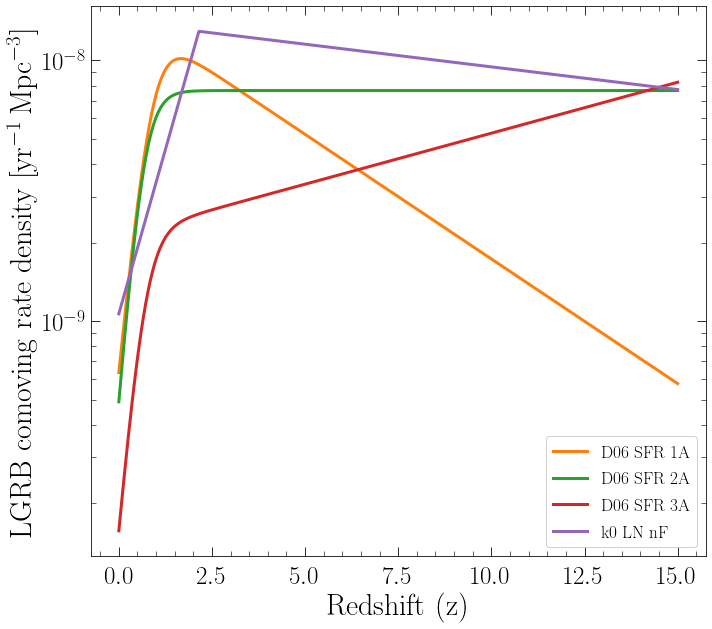

In [31]:
# Adjusting the collapse rate
z = np.linspace(0,15, 1000)
D06_1A = ff.qD06(z, SFR=1, mod='A')
D06_2A = ff.qD06(z, SFR=2, mod='A')
D06_3A = ff.qD06(z, SFR=3, mod='A')
D06_1LN = ff.qD06(z, SFR=1, mod='LN')
D06_2LN = ff.qD06(z, SFR=2, mod='LN')
D06_3LN = ff.qD06(z, SFR=3, mod='LN')

k0_LN_nF = ff.BExp(z, a=1.16, b=-0.04, zm=2.15, SFR_norm=1.066e-09, IMF_norm=1)

P16 = ff.P16(z, gamma_3=5.8)
P162 = ff.P16(z, gamma_0=7e-10 ,gamma_1=2.7, gamma_2=2.9, gamma_3=5.6)
# SH = ff.SH(z)
# P20 = ff.BExp(z)
WP10 = ff.BPL_z(z)
H14 = ff.BPL_z(z, zm=3.6, a=2.1, b=-0.7, nGRB0=0.75e-9)

print("D06_1A nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_1A[0]))
print("D06_2A nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_2A[0]))
print("D06_3A nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_3A[0]))
print("D06_1LN nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_1LN[0]))
print("D06_2LN nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_2LN[0]))
print("D06_3LN nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_3LN[0]))
print("P16 nGRB0 : {:.3e} yr-1 Mpc-3".format(P16[0]))

fig, ax = plt.subplots(figsize=(10,9))
ax.plot(z, D06_1A, label='D06 SFR 1A', color='C1')
ax.plot(z, D06_2A, label='D06 SFR 2A', color='C2')
ax.plot(z, D06_3A, label='D06 SFR 3A', color='C3')
ax.plot(z, k0_LN_nF, label='k0 LN nF', color='C4')
# ax.plot(z, D06_1LN, label='D06 SFR 1LN', ls='--', color='C1')
# ax.plot(z, D06_2LN, label='D06 SFR 2LN', ls='--', color='C2')
# ax.plot(z, D06_3LN, label='D06 SFR 3LN', ls='--', color='C3')

# art, = ax.plot(z, P16, label='P16', color='C4')
# ax.plot(z, P162, label='P162', ls='--', color='k')

# ax.plot(z, WP10, label='WP10', color='C0')
# ax.plot(z, H14, label='H14', color='C5')
# pf.plot_Pescalli_2016_GRB_rate(ax=ax, fmt='.', color=plt.getp(art, 'color'))
ax.legend()
ax.set_yscale('log')
ax.set_xlabel(r'Redshift (z)')
ax.set_ylabel(r'LGRB comoving rate density [$\rm yr^{-1}\,Mpc^{-3}$]')
plt.show()

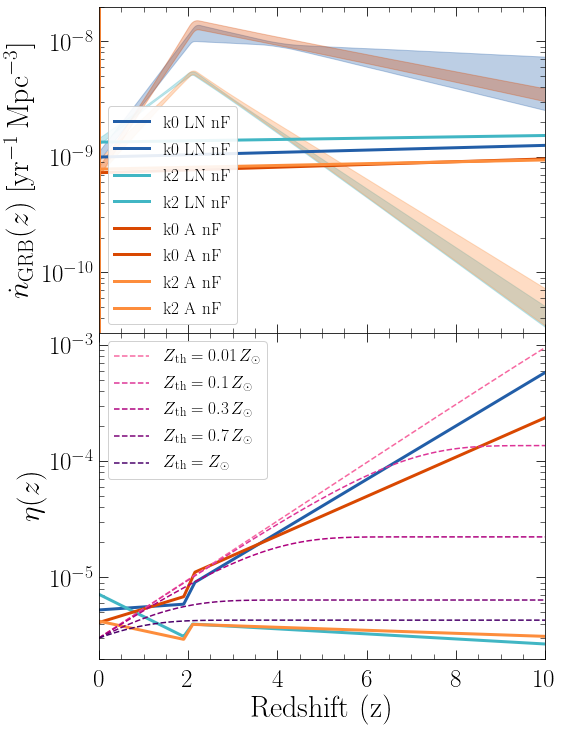

In [22]:
plt.style.use('paper')
colors = ['#225ea8', '#41b6c4', '#d94801', '#fd8d3c']
colors_Z = ['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a']
z = np.linspace(0,10, 1000)
SFR = ff.BExp(z)
k0_A_nF = ff.BExp(z, a=1.37, b=-0.18, zm=2.15, nGRB0=8.302e-10)
k2_A_nF = ff.BExp(z, a=0.91, b=-0.6, zm=2.1, nGRB0=8.544e-10)
k0_LN_nF = ff.BExp(z, a=1.16, b=-0.04, zm=2.15, nGRB0=1.066e-09)
k2_LN_nF = ff.BExp(z, a=0.66, b=-0.62, zm=2.1, nGRB0=1.454e-09)

k0_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k0_A_nF.txt')
k2_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k2_A_nF.txt')
k0_LN_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k0_LN_nF.txt')
k2_LN_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k2_LN_nF.txt')

Zth001 = met_mass_fraction(z, 0.01)
Zth01 = met_mass_fraction(z, 0.1)
Zth03 = met_mass_fraction(z, 0.3)
Zth07 = met_mass_fraction(z, 0.7)
Zth1 = met_mass_fraction(z, 1)
Zth001 = 3e-6*Zth001 / Zth001[0]
Zth01 = 3e-6*Zth01 / Zth01[0] 
Zth03 = 3e-6*Zth03 / Zth03[0] 
Zth07 = 3e-6*Zth07 / Zth07[0] 
Zth1 = 3e-6*Zth1 / Zth1[0] 

fig, axes = plt.subplots(2, figsize=(8,12), sharex=True, tight_layout=False)
ax1 = axes[0]
ax2 = axes[1]
# ax1.plot(z, SFR, label='SFR', color='k')
ax1.plot(z, k0_LN_nF, label='k0 LN nF', color=colors[0])
ax1.plot(z, k2_LN_nF, label='k2 LN nF', color=colors[1])
ax1.plot(z, k0_A_nF, label='k0 A nF', color=colors[2])
ax1.plot(z, k2_A_nF, label='k2 A nF', color=colors[3])

# fig2, ax3 = plt.subplots()
ax1.fill_between(k0_LN_nF_f90['z'], k0_LN_nF_f90['upper'], k0_LN_nF_f90['lower'], alpha=0.3, color=colors[0])
ax1.fill_between(k2_LN_nF_f90['z'], k2_LN_nF_f90['upper'], k2_LN_nF_f90['lower'], alpha=0.3, color=colors[1])
ax1.fill_between(k0_A_nF_f90['z'], k0_A_nF_f90['upper'], k0_A_nF_f90['lower'], alpha=0.3, color=colors[2])
ax1.fill_between(k2_A_nF_f90['z'], k2_A_nF_f90['upper'], k2_A_nF_f90['lower'], alpha=0.3, color=colors[3])
# ax3.set_xlim(0,10)
# ax3.set_yscale('log')
# ax3.set_ylabel(r'$\dot{n}_{\rm GRB}(z)~[\rm yr^{-1}\,Mpc^{-3}$]')

ax1.set_xlim(0,10)
ax1.set_ylim(3e-11,2e-8)
ax1.set_yscale('log')
ax1.set_ylabel(r'$\dot{n}_{\rm GRB}(z)~[\rm yr^{-1}\,Mpc^{-3}$]')

# ax2.plot(z, SFR/SFR, label='SFR', color='k')
ax2.plot(z, k0_LN_nF/SFR, color=colors[0], lw=3)
ax2.plot(z, k2_LN_nF/SFR, color=colors[1], lw=3)
ax2.plot(z, k0_A_nF/SFR, color=colors[2], lw=3)
ax2.plot(z, k2_A_nF/SFR, color=colors[3], lw=3)

ax2.plot(z, Zth001, label=r'$Z_{\rm th}=0.01\,Z_{\odot}$', ls='--', lw=1.5, color=colors_Z[-5])
ax2.plot(z, Zth01, label=r'$Z_{\rm th}=0.1\,Z_{\odot}$', ls='--', lw=1.5, color=colors_Z[-4])
ax2.plot(z, Zth03, label=r'$Z_{\rm th}=0.3\,Z_{\odot}$', ls='--', lw=1.5, color=colors_Z[-3])
ax2.plot(z, Zth07, label=r'$Z_{\rm th}=0.7\,Z_{\odot}$', ls='--', lw=1.5, color=colors_Z[-2])
ax2.plot(z, Zth1, label=r'$Z_{\rm th}=Z_{\odot}$', ls='--', lw=1.5, color=colors_Z[-1])

ax1.legend(loc='lower left')
ax2.legend(loc='upper left')
ax2.set_yscale('log')
ax2.set_xlabel('Redshift (z)')
ax2.set_ylabel('$\eta(z)$')

fig.subplots_adjust(hspace=0)
fig.savefig('/Users/palmerio/Science_projects/Papers/LGRB_population_model/plots/LGRB_efficiency.pdf', bbox_inches='tight')


MD14 rho0_* : 1.110e-04 Msun yr-1 Mpc-3
HB06 rho0_* : 1.462e-04 Msun yr-1 Mpc-3
Rob15 rho0_* : 1.017e-04 Msun yr-1 Mpc-3
Li08 rho0_* : 1.165e-04 Msun yr-1 Mpc-3


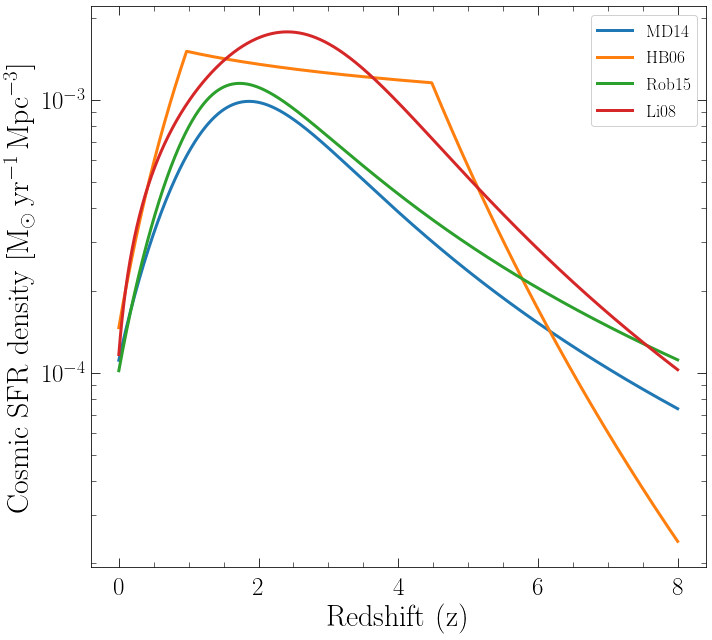

In [4]:
# SFRs
z = np.linspace(0,8, 1000)
MD14 = ff.MD14(z)
HB06 = ff.HB06(z)*0.007422
Rob15 = ff.Rob15(z)
Li08 = ff.Li08(z)
print("MD14 rho0_* : {:.3e} Msun yr-1 Mpc-3".format(MD14[0]))
print("HB06 rho0_* : {:.3e} Msun yr-1 Mpc-3".format(HB06[0]))
print("Rob15 rho0_* : {:.3e} Msun yr-1 Mpc-3".format(Rob15[0]))
print("Li08 rho0_* : {:.3e} Msun yr-1 Mpc-3".format(Li08[0]))

fig, ax = plt.subplots(figsize=(10,9))
ax.plot(z, MD14, label='MD14')
ax.plot(z, HB06, label='HB06')
ax.plot(z, Rob15, label='Rob15')
ax.plot(z, Li08, label='Li08')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel(r'Redshift (z)')
ax.set_ylabel(r'Cosmic SFR density [$\rm M_{\odot}\,yr^{-1}\,Mpc^{-3}$]')
plt.show()

In [3]:
def read_file(fname):
    df = pd.read_csv(fname, sep='\t')
    df.rename(columns=lambda x:x.strip(), inplace=True)
    df.rename(columns={'# z':'z'}, inplace=True)
    return df

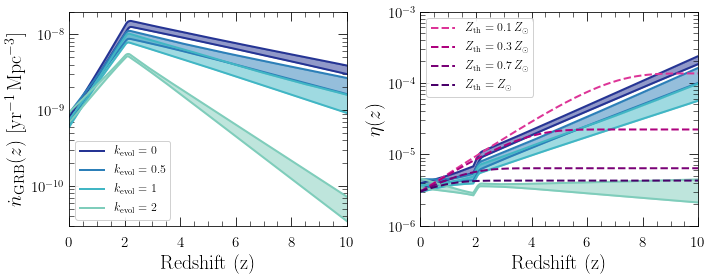

In [23]:
plt.style.use('presentation')
colors = ['#253494', '#2c7fb8', '#41b6c4', '#7fcdbb']
colors_Z = ['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a']


k0_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k0_A_nF.txt')
k05_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k05_A_nF.txt')
k1_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k1_A_nF.txt')
k2_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k2_A_nF.txt')

z = k0_A_nF_f90['z']
SFR = ff.BExp(z)

Zth001 = met_mass_fraction(z, 0.01)
Zth01 = met_mass_fraction(z, 0.1)
Zth03 = met_mass_fraction(z, 0.3)
Zth07 = met_mass_fraction(z, 0.7)
Zth1 = met_mass_fraction(z, 1)
Zth001 = 3e-6*Zth001 / Zth001[0]
Zth01 = 3e-6*Zth01 / Zth01[0] 
Zth03 = 3e-6*Zth03 / Zth03[0] 
Zth07 = 3e-6*Zth07 / Zth07[0] 
Zth1 = 3e-6*Zth1 / Zth1[0] 

fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, tight_layout=True)
ax1 = axes[0]
ax2 = axes[1]

# ax1.plot(k0_A_nF_f90['z'], k0_A_nF_f90['median'], label='k0 A nF', color=colors[0])
# ax1.plot(k1_A_nF_f90['z'], k1_A_nF_f90['median'], label='k1 A nF', color=colors[2])
# ax1.plot(k2_A_nF_f90['z'], k2_A_nF_f90['median'], label='k2 A nF', color=colors[3])

ax1.plot(k0_A_nF_f90['z'], k0_A_nF_f90['lower'], lw=2, color=colors[0])
ax1.plot(k05_A_nF_f90['z'], k05_A_nF_f90['lower'], lw=2, color=colors[1])
ax1.plot(k1_A_nF_f90['z'], k1_A_nF_f90['lower'], lw=2, color=colors[2])
ax1.plot(k2_A_nF_f90['z'], k2_A_nF_f90['lower'], lw=2, color=colors[3])
ax1.plot(k0_A_nF_f90['z'], k0_A_nF_f90['upper'], lw=2, color=colors[0], label=r'$k_{\rm evol} = 0$')
ax1.plot(k05_A_nF_f90['z'], k05_A_nF_f90['upper'], lw=2, color=colors[1], label=r'$k_{\rm evol} = 0.5$')
ax1.plot(k1_A_nF_f90['z'], k1_A_nF_f90['upper'], lw=2, color=colors[2], label=r'$k_{\rm evol} = 1$')
ax1.plot(k2_A_nF_f90['z'], k2_A_nF_f90['upper'], lw=2, color=colors[3], label=r'$k_{\rm evol} = 2$')

ax1.fill_between(k0_A_nF_f90['z'], k0_A_nF_f90['upper'], k0_A_nF_f90['lower'], alpha=0.5, color=colors[0])
ax1.fill_between(k05_A_nF_f90['z'], k05_A_nF_f90['upper'], k05_A_nF_f90['lower'], alpha=0.5, color=colors[1])
ax1.fill_between(k1_A_nF_f90['z'], k1_A_nF_f90['upper'], k1_A_nF_f90['lower'], alpha=0.5, color=colors[2])
ax1.fill_between(k2_A_nF_f90['z'], k2_A_nF_f90['upper'], k2_A_nF_f90['lower'], alpha=0.5, color=colors[3])

ax1.set_xlim(0,10)
ax1.set_ylim(3e-11,2e-8)
ax1.set_yscale('log')
ax1.set_ylabel(r'$\dot{n}_{\rm GRB}(z)~[\rm yr^{-1}\,Mpc^{-3}$]')

# ax2.plot(k0_A_nF_f90['z'], k0_A_nF_f90['median']/SFR, color=colors[0])
# ax2.plot(k1_A_nF_f90['z'], k1_A_nF_f90['median']/SFR, color=colors[2])
# ax2.plot(k2_A_nF_f90['z'], k2_A_nF_f90['median']/SFR, color=colors[3])

ax2.plot(k0_A_nF_f90['z'], k0_A_nF_f90['lower']/SFR, color=colors[0], lw=2)
ax2.plot(k05_A_nF_f90['z'], k05_A_nF_f90['lower']/SFR, color=colors[1], lw=2)
ax2.plot(k1_A_nF_f90['z'], k1_A_nF_f90['lower']/SFR, color=colors[2], lw=2)
ax2.plot(k2_A_nF_f90['z'], k2_A_nF_f90['lower']/SFR, color=colors[3], lw=2)
ax2.plot(k0_A_nF_f90['z'], k0_A_nF_f90['upper']/SFR, color=colors[0], lw=2)
ax2.plot(k05_A_nF_f90['z'], k05_A_nF_f90['upper']/SFR, color=colors[1], lw=2)
ax2.plot(k1_A_nF_f90['z'], k1_A_nF_f90['upper']/SFR, color=colors[2], lw=2)
ax2.plot(k2_A_nF_f90['z'], k2_A_nF_f90['upper']/SFR, color=colors[3], lw=2)

ax2.fill_between(k0_A_nF_f90['z'], k0_A_nF_f90['upper']/SFR, k0_A_nF_f90['lower']/SFR, alpha=0.5, color=colors[0])
ax2.fill_between(k05_A_nF_f90['z'], k05_A_nF_f90['upper']/SFR, k05_A_nF_f90['lower']/SFR, alpha=0.5, color=colors[1])
ax2.fill_between(k1_A_nF_f90['z'], k1_A_nF_f90['upper']/SFR, k1_A_nF_f90['lower']/SFR, alpha=0.5, color=colors[2])
ax2.fill_between(k2_A_nF_f90['z'], k2_A_nF_f90['upper']/SFR, k2_A_nF_f90['lower']/SFR, alpha=0.5, color=colors[3])


# ax2.plot(z, Zth001, label=r'$Z_{\rm th}=0.01\,Z_{\odot}$', ls='--', lw=1.5, color=colors_Z[-5])
ax2.plot(z, Zth01, label=r'$Z_{\rm th}=0.1\,Z_{\odot}$', ls='--', lw=2, color=colors_Z[-4])
ax2.plot(z, Zth03, label=r'$Z_{\rm th}=0.3\,Z_{\odot}$', ls='--', lw=2, color=colors_Z[-3])
ax2.plot(z, Zth07, label=r'$Z_{\rm th}=0.7\,Z_{\odot}$', ls='--', lw=2, color=colors_Z[-2])
ax2.plot(z, Zth1, label=r'$Z_{\rm th}=Z_{\odot}$', ls='--', lw=2, color=colors_Z[-1])
ax2.set_ylim(1e-6,1e-3)

ax1.legend(loc='lower left')
ax2.legend(loc='upper left')
ax2.set_yscale('log')
ax1.set_xlabel('Redshift (z)')
ax2.set_xlabel('Redshift (z)')
ax2.set_ylabel('$\eta(z)$')

fig.subplots_adjust(hspace=0)
# fig.savefig('/Users/palmerio/Science_projects/Papers/LGRB_population_model/plots/LGRB_efficiency2.pdf', bbox_inches='tight')


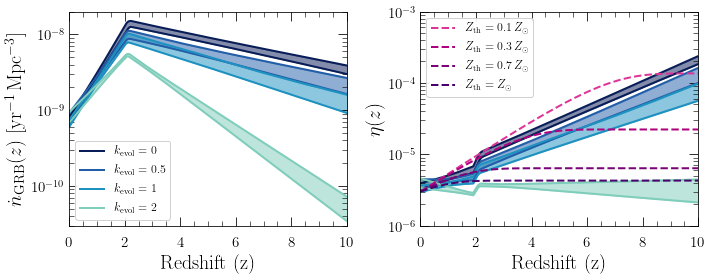

In [22]:
plt.style.use('presentation')
colors = ['#081d58','#225ea8', '#1d91c0','#7fcdbb']
# colors = ['#662506', '#ec7014', '#e31a1c','#fa9fb5']
colors_Z = ['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a']


k0_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k0_A_nF.txt')
k05_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k05_A_nF.txt')
k1_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k1_A_nF.txt')
k2_A_nF_f90 = read_file(f'../model_outputs_non-dockerized/best_populations/z_distr_k2_A_nF.txt')

z = k0_A_nF_f90['z']
SFR = ff.BExp(z)

Zth001 = met_mass_fraction(z, 0.01)
Zth01 = met_mass_fraction(z, 0.1)
Zth03 = met_mass_fraction(z, 0.3)
Zth07 = met_mass_fraction(z, 0.7)
Zth1 = met_mass_fraction(z, 1)
Zth001 = 3e-6*Zth001 / Zth001[0]
Zth01 = 3e-6*Zth01 / Zth01[0] 
Zth03 = 3e-6*Zth03 / Zth03[0] 
Zth07 = 3e-6*Zth07 / Zth07[0] 
Zth1 = 3e-6*Zth1 / Zth1[0] 

fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, tight_layout=True)
ax1 = axes[0]
ax2 = axes[1]

# ax1.plot(k0_A_nF_f90['z'], k0_A_nF_f90['median'], label='k0 A nF', color=colors[0])
# ax1.plot(k1_A_nF_f90['z'], k1_A_nF_f90['median'], label='k1 A nF', color=colors[2])
# ax1.plot(k2_A_nF_f90['z'], k2_A_nF_f90['median'], label='k2 A nF', color=colors[3])

ax1.plot(k0_A_nF_f90['z'], k0_A_nF_f90['lower'], lw=2, color=colors[0])
ax1.plot(k05_A_nF_f90['z'], k05_A_nF_f90['lower'], lw=2, color=colors[1])
ax1.plot(k1_A_nF_f90['z'], k1_A_nF_f90['lower'], lw=2, color=colors[2])
ax1.plot(k2_A_nF_f90['z'], k2_A_nF_f90['lower'], lw=2, color=colors[3])
ax1.plot(k0_A_nF_f90['z'], k0_A_nF_f90['upper'], lw=2, color=colors[0], label=r'$k_{\rm evol} = 0$')
ax1.plot(k05_A_nF_f90['z'], k05_A_nF_f90['upper'], lw=2, color=colors[1], label=r'$k_{\rm evol} = 0.5$')
ax1.plot(k1_A_nF_f90['z'], k1_A_nF_f90['upper'], lw=2, color=colors[2], label=r'$k_{\rm evol} = 1$')
ax1.plot(k2_A_nF_f90['z'], k2_A_nF_f90['upper'], lw=2, color=colors[3], label=r'$k_{\rm evol} = 2$')

ax1.fill_between(k0_A_nF_f90['z'], k0_A_nF_f90['upper'], k0_A_nF_f90['lower'], alpha=0.5, color=colors[0])
ax1.fill_between(k05_A_nF_f90['z'], k05_A_nF_f90['upper'], k05_A_nF_f90['lower'], alpha=0.5, color=colors[1])
ax1.fill_between(k1_A_nF_f90['z'], k1_A_nF_f90['upper'], k1_A_nF_f90['lower'], alpha=0.5, color=colors[2])
ax1.fill_between(k2_A_nF_f90['z'], k2_A_nF_f90['upper'], k2_A_nF_f90['lower'], alpha=0.5, color=colors[3])

ax1.set_xlim(0,10)
ax1.set_ylim(3e-11,2e-8)
ax1.set_yscale('log')
ax1.set_ylabel(r'$\dot{n}_{\rm GRB}(z)~[\rm yr^{-1}\,Mpc^{-3}$]')

# ax2.plot(k0_A_nF_f90['z'], k0_A_nF_f90['median']/SFR, color=colors[0])
# ax2.plot(k1_A_nF_f90['z'], k1_A_nF_f90['median']/SFR, color=colors[2])
# ax2.plot(k2_A_nF_f90['z'], k2_A_nF_f90['median']/SFR, color=colors[3])

ax2.plot(k0_A_nF_f90['z'], k0_A_nF_f90['lower']/SFR, color=colors[0], lw=2)
ax2.plot(k05_A_nF_f90['z'], k05_A_nF_f90['lower']/SFR, color=colors[1], lw=2)
ax2.plot(k1_A_nF_f90['z'], k1_A_nF_f90['lower']/SFR, color=colors[2], lw=2)
ax2.plot(k2_A_nF_f90['z'], k2_A_nF_f90['lower']/SFR, color=colors[3], lw=2)
ax2.plot(k0_A_nF_f90['z'], k0_A_nF_f90['upper']/SFR, color=colors[0], lw=2)
ax2.plot(k05_A_nF_f90['z'], k05_A_nF_f90['upper']/SFR, color=colors[1], lw=2)
ax2.plot(k1_A_nF_f90['z'], k1_A_nF_f90['upper']/SFR, color=colors[2], lw=2)
ax2.plot(k2_A_nF_f90['z'], k2_A_nF_f90['upper']/SFR, color=colors[3], lw=2)

ax2.fill_between(k0_A_nF_f90['z'], k0_A_nF_f90['upper']/SFR, k0_A_nF_f90['lower']/SFR, alpha=0.5, color=colors[0])
ax2.fill_between(k05_A_nF_f90['z'], k05_A_nF_f90['upper']/SFR, k05_A_nF_f90['lower']/SFR, alpha=0.5, color=colors[1])
ax2.fill_between(k1_A_nF_f90['z'], k1_A_nF_f90['upper']/SFR, k1_A_nF_f90['lower']/SFR, alpha=0.5, color=colors[2])
ax2.fill_between(k2_A_nF_f90['z'], k2_A_nF_f90['upper']/SFR, k2_A_nF_f90['lower']/SFR, alpha=0.5, color=colors[3])


# ax2.plot(z, Zth001, label=r'$Z_{\rm th}=0.01\,Z_{\odot}$', ls='--', lw=1.5, color=colors_Z[-5])
ax2.plot(z, Zth01, label=r'$Z_{\rm th}=0.1\,Z_{\odot}$', ls='--', lw=2, color=colors_Z[-4])
ax2.plot(z, Zth03, label=r'$Z_{\rm th}=0.3\,Z_{\odot}$', ls='--', lw=2, color=colors_Z[-3])
ax2.plot(z, Zth07, label=r'$Z_{\rm th}=0.7\,Z_{\odot}$', ls='--', lw=2, color=colors_Z[-2])
ax2.plot(z, Zth1, label=r'$Z_{\rm th}=Z_{\odot}$', ls='--', lw=2, color=colors_Z[-1])
ax2.set_ylim(1e-6,1e-3)

ax1.legend(loc='lower left')
ax2.legend(loc='upper left')
ax2.set_yscale('log')
ax1.set_xlabel('Redshift (z)')
ax2.set_xlabel('Redshift (z)')
ax2.set_ylabel('$\eta(z)$')

fig.subplots_adjust(hspace=0)
# fig.savefig('/Users/palmerio/Science_projects/Papers/LGRB_population_model/plots/LGRB_efficiency2.pdf', bbox_inches='tight')
